# Ejemplo 1 de Análisis de Varianza

# Modelo Simple 

Supongamos que un cierto tipo de motor de cohete se fabrica uniendo un propulsor tipo A y un propulsor tipo B. La fuerza del enlace entre los dos propulsores es una característica de importancia y se sospecha que está relacionada con la edad (en semanas) del lote del propulsor tipo B. Se tiene una muestra de tamaño 20 de la fuerza del enlace y la edad del lote del propulsor tipo B que fue utilizado.

In [1]:
datos <- data.frame(
  Fuerza_enlace = c(
    2158.70, 1678.15, 2316.00, 2061.30, 2207.50,
    1708.30, 1784.70, 2575.00, 2357.90, 2256.70,
    2165.20, 2399.55, 1779.80, 2336.75, 1765.30,
    2053.50, 2414.40, 2200.50, 2654.20, 1753.70
  ),
  Edad_lote = c(
    15.50, 23.75, 8.00, 17.00, 5.50,
    19.00, 24.00, 2.50, 7.50, 11.00,
    13.00, 3.75, 25.00, 9.75, 22.00,
    18.00, 6.00, 12.50, 2.00, 21.50
  )
)

datos

Fuerza_enlace,Edad_lote
<dbl>,<dbl>
2158.70,15.50
1678.15,23.75
2316.00,8.00
2061.30,17.00
2207.50,5.50
1708.30,19.00
1784.70,24.00
2575.00,2.50
2357.90,7.50


## Modelos

In [5]:
modelo_completo <- lm(Fuerza_enlace ~ Edad_lote,datos)
summary(modelo_completo)


Call:
lm(formula = Fuerza_enlace ~ Edad_lote, data = datos)

Residuals:
    Min      1Q  Median      3Q     Max 
-215.98  -50.68   28.74   66.61  106.76 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 2627.822     44.184   59.48  < 2e-16 ***
Edad_lote    -37.154      2.889  -12.86 1.64e-10 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 96.11 on 18 degrees of freedom
Multiple R-squared:  0.9018,	Adjusted R-squared:  0.8964 
F-statistic: 165.4 on 1 and 18 DF,  p-value: 1.643e-10


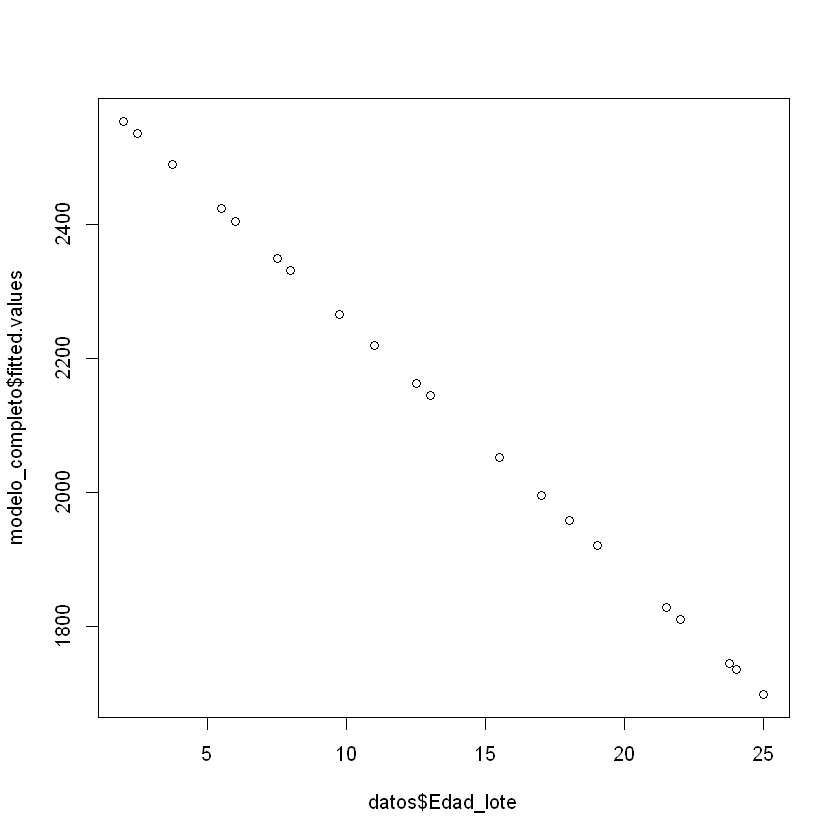

In [4]:
plot(datos$Edad_lote,modelo_completo$fitted.values)

In [7]:
modelo_reducido <- lm(Fuerza_enlace ~ 1,datos)
summary(modelo_reducido)


Call:
lm(formula = Fuerza_enlace ~ 1, data = datos)

Residuals:
    Min      1Q  Median      3Q     Max 
-453.21 -347.88   51.49  210.68  522.84 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  2131.36      66.76   31.93   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 298.6 on 19 degrees of freedom


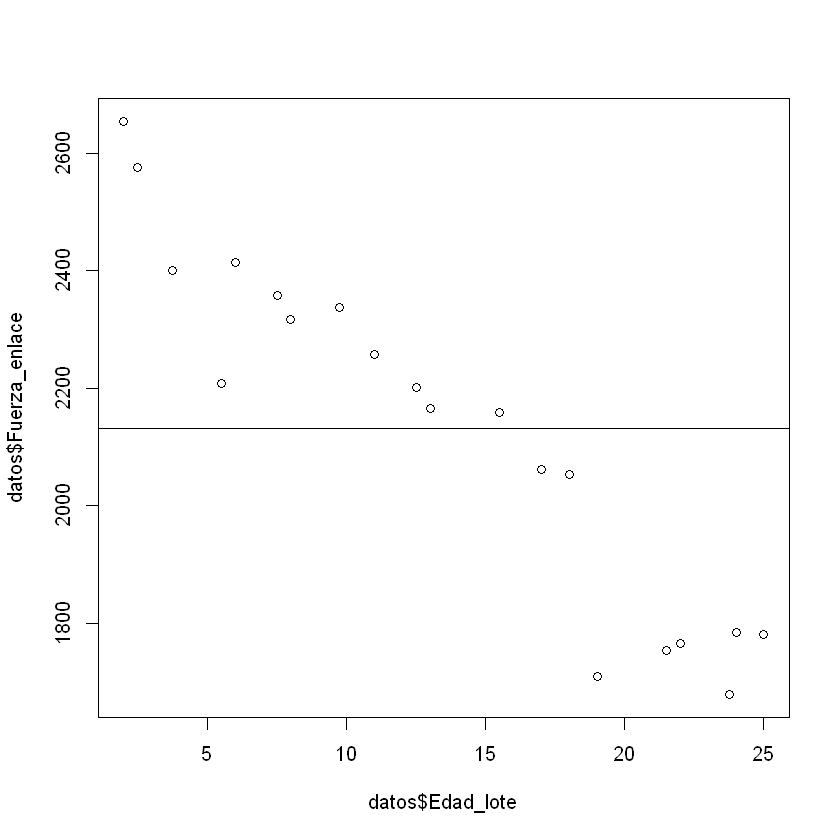

In [10]:
plot(datos$Edad_lote,datos$Fuerza_enlace)
abline(modelo_reducido)

## ANOVAs

In [11]:
anova(modelo_completo)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
Edad_lote,1,1527482.7,1527482.743,165.3768,1.643344e-10
Residuals,18,166254.9,9236.381,NA,NA


# Modelo Múltiple

 Considere los siguientes datos en los que se tienen mediciones del tamaño de infarto, área de la región en riesgo y dos variables que identifican el tipo de tratamiento utilizado en 32 pacientes. Se busca describir el tamaño del infarto a través de las otras 3-variables. Para este caso, vamos a ajustar un modelo de regresión lineal múltiple completo y después vamos a hacer pruebas sobre quitar algunas variables.

In [16]:
datos <- data.frame(
  Paciente = 1:32,
  Infarc = c(
    0.119, 0.190, 0.395, 0.469, 0.130, 0.311, 0.418, 0.480,
    0.687, 0.847, 0.062, 0.122, 0.033, 0.102, 0.206, 0.249,
    0.220, 0.299, 0.350, 0.350, 0.588, 0.379, 0.149, 0.316,
    0.390, 0.429, 0.477, 0.439, 0.446, 0.538, 0.625, 0.974
  ),
  Area = c(
    0.34, 0.64, 0.76, 0.83, 0.73, 0.82, 0.95, 1.06,
    1.20, 1.47, 0.44, 0.77, 0.90, 1.07, 1.01, 1.03,
    1.16, 1.21, 1.20, 1.22, 0.99, 0.77, 1.05, 1.06,
    1.02, 0.99, 0.97, 1.12, 1.23, 1.19, 1.22, 1.40
  ),
  X2 = c(
    0,0,0,0,0,0,0,0,
    0,0,1,1,1,1,1,1,
    1,1,1,1,1,0,0,0,
    0,0,0,0,0,0,0,0
  ),
  X3 = c(
    0,0,0,0,0,0,0,0,
    0,0,0,0,0,0,0,0,
    0,0,0,0,0,0,1,1,
    1,1,1,1,1,1,1,1
  )
)
head(datos)

,Paciente,Infarc,Area,X2,X3
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,0.119,0.34,0,0
2,2,0.190,0.64,0,0
3,3,0.395,0.76,0,0
4,4,0.469,0.83,0,0
5,5,0.130,0.73,0,0
6,6,0.311,0.82,0,0


In [17]:
modelo_completo <- lm(Infarc ~ Area + X2 + X3,datos)
summary(modelo_completo)


Call:
lm(formula = Infarc ~ Area + X2 + X3, data = datos)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.28175 -0.06704 -0.01658  0.06294  0.35970 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.14927    0.10377  -1.439 0.161376    
Area         0.63395    0.10927   5.802 3.12e-06 ***
X2          -0.25005    0.06053  -4.131 0.000295 ***
X3          -0.08563    0.06641  -1.289 0.207831    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.138 on 28 degrees of freedom
Multiple R-squared:  0.6456,	Adjusted R-squared:  0.6076 
F-statistic:    17 on 3 and 28 DF,  p-value: 1.748e-06


In [21]:
TableAnova <- anova(modelo_completo)

In [23]:
SCE_X1 <- TableAnova$`Sum Sq`[1]
SSE_C <- TableAnova$`Sum Sq`[4]
df1 <- TableAnova$Df[4]
df2 <- nrow(datos) - 3 - TableAnova$Df[1]

F_g <- (SCE_X1/df1) / (SSE_C/df2)
F_g

[1] 1.172302

In [34]:
SCE_X1X2X3 <- sum(TableAnova$`Sum Sq`[1:3])
df1 <- nrow(datos) - 1 - df2

F_all <- (SCE_X1X2X3/df1) / (SSE_C/df2)
F_all

[1] 17.00263

In [31]:
pf(F_all,3,28,lower.tail = FALSE)

[1] 1.747583e-06

In [36]:
SCE_X2X3 <- sum(TableAnova$`Sum Sq`[2:3])
df1 <- nrow(datos) - 2 - df2

F_dos <- (SCE_X2X3/df1) / (SSE_C/df2)
F_dos

[1] 9.091716

In [37]:
pf(F_dos,2,28,lower.tail = FALSE)

[1] 0.0009065789